In [4]:
%cd ..

import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

import sys,os

import functions,loading

import nelpy as nel  # main nelpy imports
import nelpy.plotting as npl  # optional plotting import

import math
import seaborn as sns
from tqdm import tqdm

d:\github\ripple_heterogeneity


In [5]:
animal = ['GirardeauG\Rat08',
    'GirardeauG\Rat09','GirardeauG\Rat10','GirardeauG\Rat11',
    'AB1','AB3','AB4','AYA4','AYA6','AYA7','AYA9','AYA10',
    'OML5','OML3','OML7','OML8','OML10','OML18','OML19',
    'Wmaze2\OR15','Wmaze2\OR18','Wmaze3\OR22','Wmaze3\OR21','Wmaze3\OR23',
    'GrosmarkAD\Cicero','GrosmarkAD\Buddy','GrosmarkAD\Achilles','GrosmarkAD\Gatsby',
    'Kenji']

dataDir1 = 'A:/Data/'
dataDir2 = 'A:/OptoMECLEC/'
dataDir3 = 'A:/ORproject/'

In [6]:
df = pd.DataFrame()
for a in tqdm(animal):
    if 'OML' in a:
        base_path = dataDir2
    elif 'Wmaze' in a:
        base_path = dataDir3
    else:
        base_path = dataDir1

    files = glob.glob(base_path+a+'/**/*.ripples.events.mat',recursive=True)

    for f in files:
        basepath, _ = os.path.split(f)
        basepath = os.path.normpath(basepath)
        basename = os.path.basename(basepath)
        # print(basepath)

        if (
            os.path.exists(os.path.join(basepath,basename+'.cell_metrics.cellinfo.mat')) &
                os.path.exists(os.path.join(basepath,basename+'.ripples.events.mat'))
           ):
            # get ripple features
            df1 = loading.load_ripples_events(basepath)
                    
            # # get cell_metrics
            # df2,_ = functions.load_cell_metrics(
            #     os.path.join(basepath,basename+'.cell_metrics.cellinfo.mat')
            #     )

            # df1['brainRegion'] = df2.brainRegion
            

            df = df.append(df1,ignore_index=True)

100%|██████████| 30/30 [03:32<00:00,  7.09s/it]


## make custom naming scheme for Kenji data

In [7]:
ids = ["ec012","ec013","ec014","ec016","f01_m",
      "g01_m","gor01","i01_m","j01_m","km01",
      "nlx"]

for id in ids:
    idx = (
            (df['basepath'].str.contains('Kenji')) &
            (df['basepath'].str.contains(id))
          )
    df.loc[idx,"animal"] = id
df

,start,stop,peaks,amplitude,duration,frequency,detectorName,event_spk_thres,basepath,basename,animal
0,3235.505600,3235.539200,3235.528000,573.370468,0.033600,153.077428,bz_FindRipples,0,A:\Data\GirardeauG\Rat08\Rat08-20130708,Rat08-20130708,Rat08
1,3948.067200,3948.095200,3948.081600,658.325370,0.028000,150.305910,bz_FindRipples,0,A:\Data\GirardeauG\Rat08\Rat08-20130708,Rat08-20130708,Rat08
2,3951.839200,3951.935200,3951.860000,571.341096,0.096000,149.599123,bz_FindRipples,0,A:\Data\GirardeauG\Rat08\Rat08-20130708,Rat08-20130708,Rat08
3,3961.140800,3961.172800,3961.152800,596.728096,0.032000,143.973429,bz_FindRipples,0,A:\Data\GirardeauG\Rat08\Rat08-20130708,Rat08-20130708,Rat08
4,4502.403200,4502.429600,4502.418400,626.371411,0.026400,148.853236,bz_FindRipples,0,A:\Data\GirardeauG\Rat08\Rat08-20130708,Rat08-20130708,Rat08
...,...,...,...,...,...,...,...,...,...,...,...
942700,31142.170927,31142.348243,31142.253195,484.479714,0.177316,143.056687,bz_FindRipples,1,A:\Data\Kenji\nlx_070329,nlx_070329,nlx
942701,31142.815495,31142.924920,31142.909744,249.901991,0.109425,142.330459,bz_FindRipples,1,A:\Data\Kenji\nlx_070329,nlx_070329,nlx
942702,31143.646965,31143.736422,31143.658946,309.583702,0.089457,148.872077,bz_FindRipples,1,A:\Data\Kenji\nlx_070329,nlx_070329,nlx
942703,31143.805911,31143.920128,31143.828275,370.504411,0.114217,138.272220,bz_FindRipples,1,A:\Data\Kenji\nlx_070329,nlx_070329,nlx


In [8]:
df.to_csv(r'D:\projects\ripple_heterogeneity\ripple_features_df.csv')


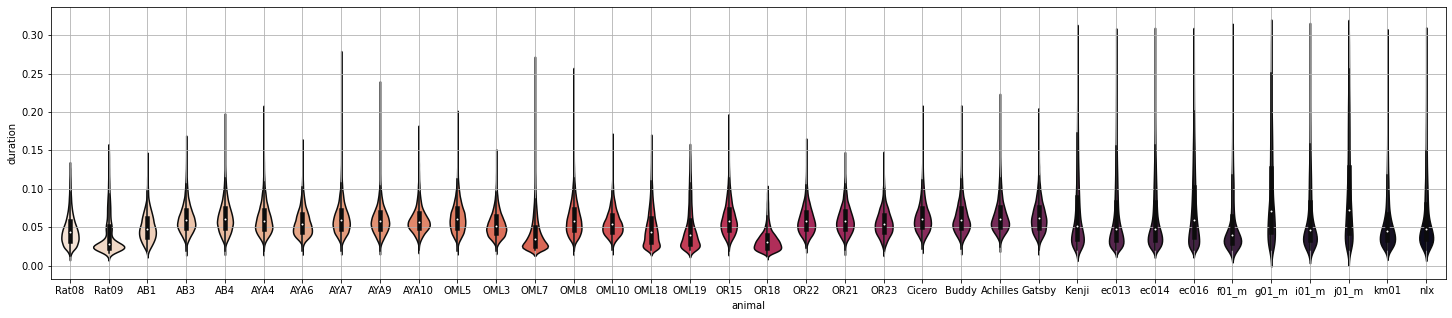

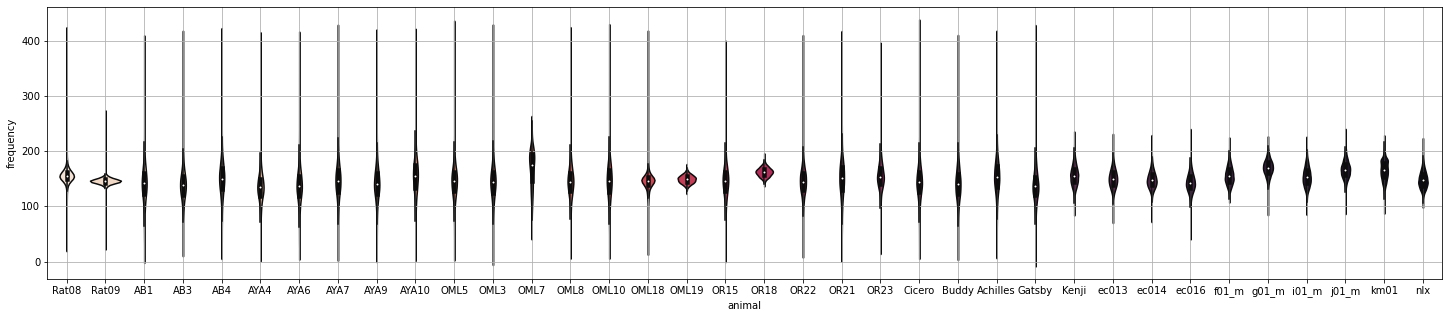

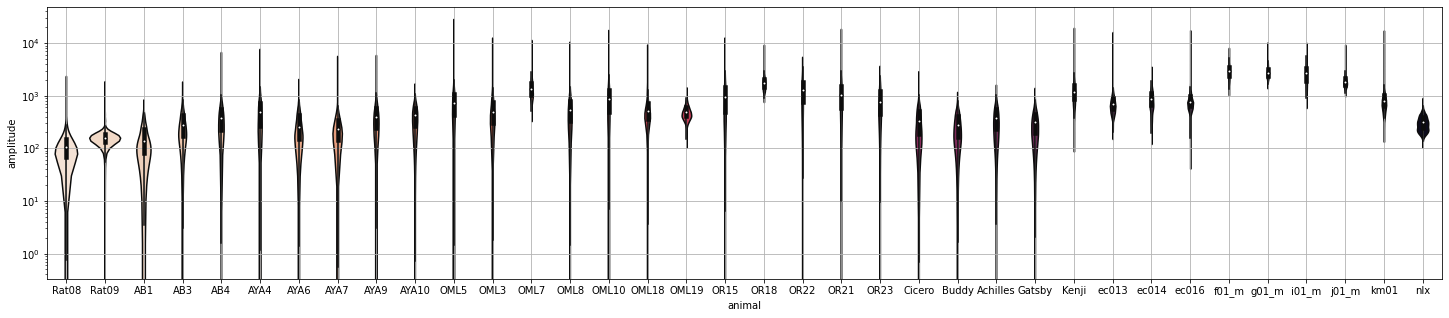

In [9]:
# g = sns.catplot(x="animal", y="duration",
#                 data=df, kind="strip",
#                 height=3, aspect=7,palette="rocket_r")
# plt.grid('on')                 
plt.figure(figsize=(25,5))
g = sns.violinplot(x="animal", y="duration", data=df,palette="rocket_r")
plt.grid('on')

plt.figure(figsize=(25,5))
g = sns.violinplot(x="animal", y="frequency", data=df,palette="rocket_r")
plt.grid('on')

plt.figure(figsize=(25,5))
g = sns.violinplot(x="animal", y="amplitude", data=df,palette="rocket_r")
plt.grid('on')
plt.yscale('log')